In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

In [3]:
cancer=pd.read_csv('BreastCancer.csv')
cancer.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign


In [4]:
X=cancer.drop('Class',axis=1)
y=cancer['Class']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=23)

In [6]:
dtc = DecisionTreeClassifier(random_state=23,max_depth=4)
dtc_fit=dtc.fit(X_train,y_train)

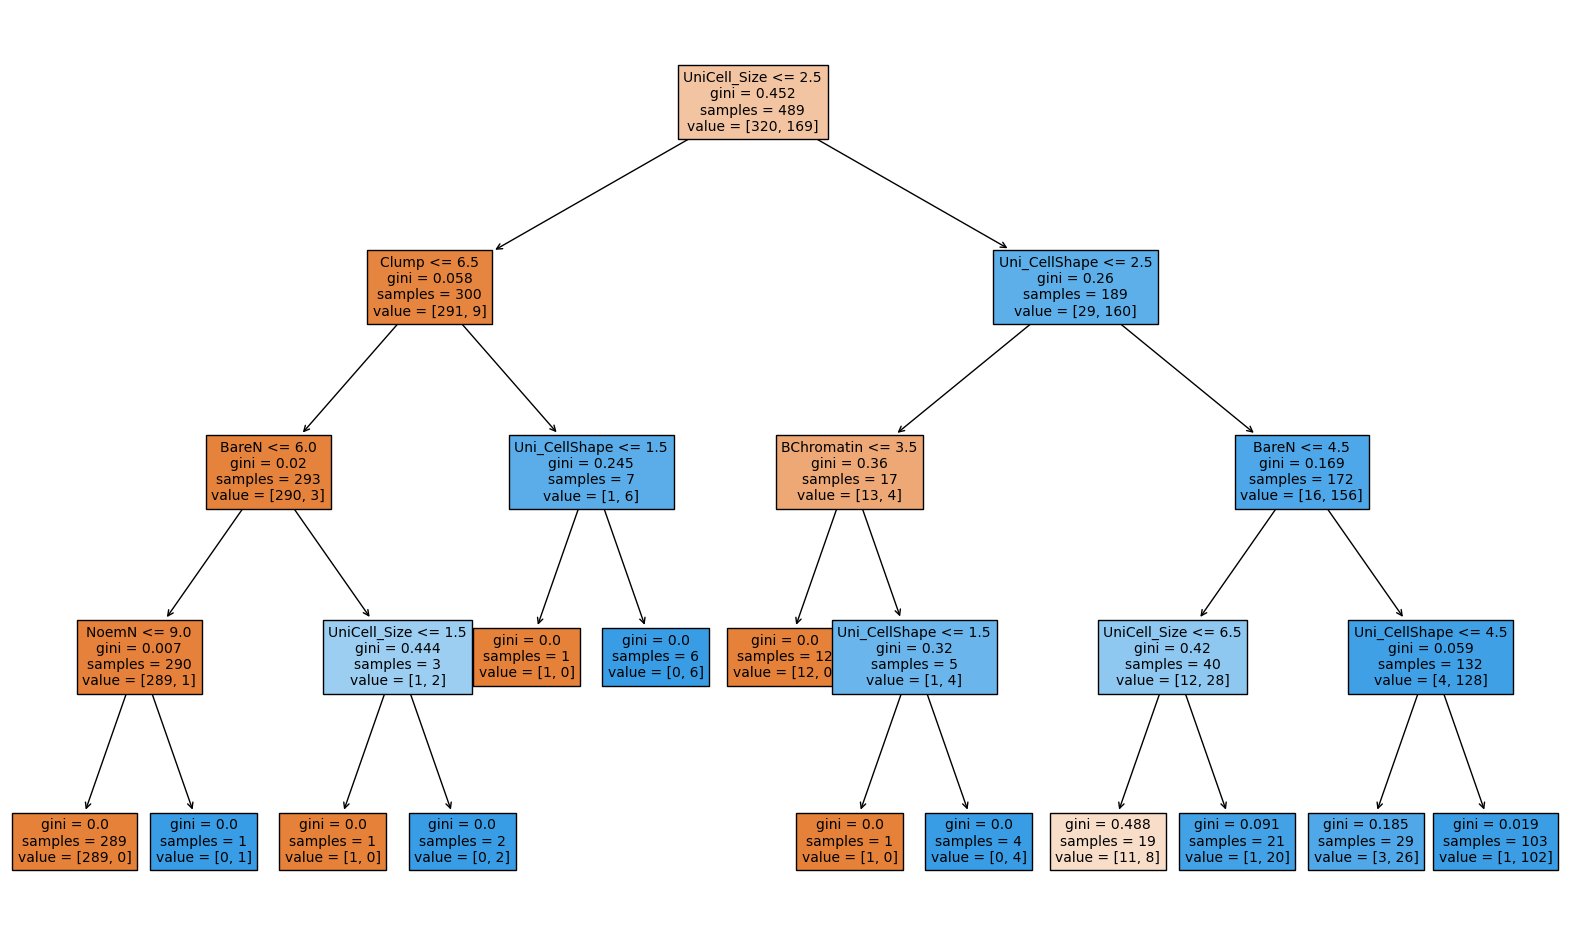

In [7]:
plt.figure(figsize=(20,12))
plot_tree(dtc_fit,feature_names=X_train.columns,filled=True,fontsize=10)
plt.show()

In [8]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [9]:
params={'max_depth':[2,3,4,5,6,None]}

In [10]:
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=4, random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None]},
             scoring='neg_log_loss')

In [11]:
print("best parameter :",gcv.best_params_)
print("best score :",gcv.best_score_)

best parameter : {'max_depth': 2}
best score : -0.2520255660175542


In [12]:
best_model = gcv.best_estimator_

In [13]:
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_,
                    'importance':best_model.feature_importances_})
df_imp=df_imp[df_imp['importance']>0.0001]

In [14]:
df_imp

,variable,importance
2,UniCell_Size,0.875501
3,Uni_CellShape,0.078563
6,BareN,0.045937


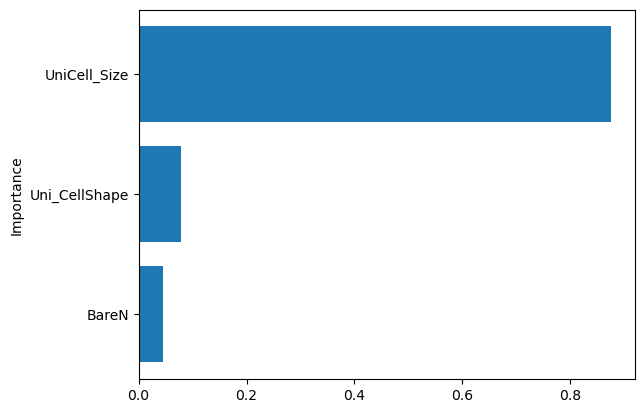

In [15]:
df_imp=df_imp.sort_values(by='importance')
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel("Importance")
plt.show()

## Using Hyperparameters

In [16]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [17]:
params={'max_depth':[2,3,4,5,6,None],
       'min_samples_split':[2,5,6,7,8,9,10],
       'min_samples_leaf':[1,3,5,7,10,15]}

In [18]:
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=4, random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 6, 7, 8, 9, 10]},
             scoring='neg_log_loss')

In [19]:
print("best parameter :",gcv.best_params_)
print("best score :",gcv.best_score_)

best parameter : {'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}
best score : -0.2456110095055712


In [20]:
best_model = gcv.best_estimator_

In [21]:
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_,
                    'importance':best_model.feature_importances_})
df_imp=df_imp[df_imp['importance']>0.0001]

In [22]:
df_imp

,variable,importance
2,UniCell_Size,0.886462
3,Uni_CellShape,0.079546
7,BChromatin,0.033991


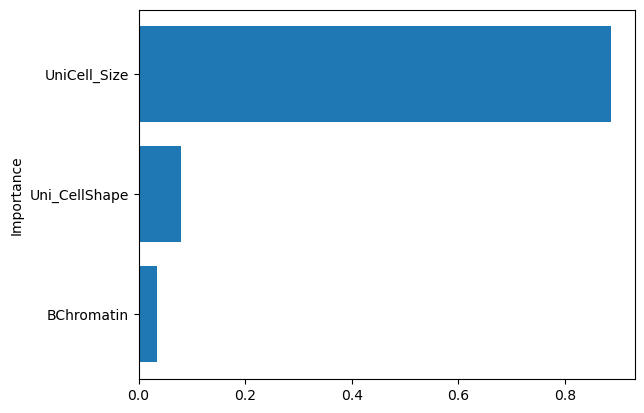

In [23]:
df_imp=df_imp.sort_values(by='importance')
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel("Importance")
plt.show()